In [23]:
import pandas as pd
import numpy as np
from functions.linear_regression import *
from functions.multi_gradient_descent import accuracy
import matplotlib.pyplot as pl

In [24]:
file = "./data from book/advertising.csv"
data = pd.read_csv(file)
data = data.drop(columns=["Unnamed: 0", "radio", "newspaper"])
print(data.head())
data = np.array(data)
# data
# comparing tv advertisements vs sales data

      TV  sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [25]:
def min__j(data,w,b):
    j= 0
    for d in data:
        j+=(w*d[0]+b-d[1])**2
    ghj = (2*data.shape[0])
    return j/ghj

In [26]:

def gradient(data, w, b):
    j_i = 0
    j_j = 0
    m = data.shape[0]
    for d in data:
        k= w*d[0] +b -d[1]
        j_i += k*d[0]
        j_j += k
        if k > 100000000000000:
            break
    grad = [1/m * j_i, 1/m * j_j]
    return grad


In [27]:
def gradient_descent(data,w,b):
    dist = 0.000006
    hist =[]
    count =0
    for i in range(50):
        count +=1
        dj_dw,dj_db =  gradient(data,w,b)

        w = w-(dist*dj_dw)
        b = b-(dist*dj_db)

        # printing
        if i%10==0:
            print(w,b,"-------------------------------- j: ",min__j(data,w,b))
            pass
        # automatic convergence check
        hist.append([w,b])
        p =False
        if len(hist)%5==0:
            diff =[]
            for k in range(4):
                diff.append([abs(hist[k][0]-hist[k+1][0]),abs(hist[k][1]-hist[k+1][1])])
            for j in diff:
                # print("--------------------------------",diff)
                if j[0]<0.00005 and j[1]<0.00005:
                    p=True
                else:
                    p=False
                    break
            hist = []
            diff = []
        if p==True:
            print("breaks",count)
            break
    return w,b


In [28]:
if __name__ == "__main__":
    w,b = gradient_descent(data,0,0)
    print(w, b)
    predict = predict_graph(data, w, b)

0.0144632502 8.413500000000002e-05 -------------------------------- j:  80.0214029564321
0.0730455835550325 0.0004884996850691776 -------------------------------- j:  13.0256542996226
0.08173361117728971 0.0006394868994117073 -------------------------------- j:  11.551790467341458
0.08302169171418787 0.0007528936952945793 -------------------------------- j:  11.51918435050012
breaks 35
0.08314128386440815 0.0007962467990629984


In [29]:
def graph(data,predict):
    pl.scatter(data[:,0],data[:,1])
    pl.plot(predict[:, 0], predict[:, 1], color='red')
    pl.show()

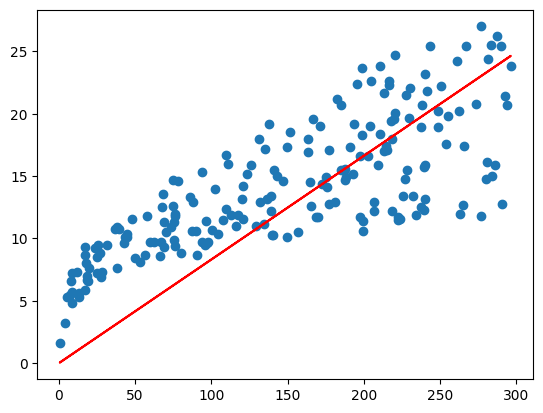

In [30]:
if __name__ == "__main__":
    graph(data,predict)

### <h1> Test 2


In [31]:
data2 = pd.read_csv("./data from book/Boston.csv")
data2 = data2[["age","crim"]]
print(data2.head())
data2 = np.array(data2)
# data2
# comparing age vs crime data


    age     crim
0  65.2  0.00632
1  78.9  0.02731
2  61.1  0.02729
3  45.8  0.03237
4  54.2  0.06905


0.001998201347822133 2.168114134387352e-05 -------------------------------- j:  42.79437947043893
0.018693112393872707 0.0001974575871839302 -------------------------------- j:  38.18283227975111
0.030633276232960447 0.00031387759001563797 -------------------------------- j:  35.82402658748191
0.039172888318233956 0.0003878464874760458 -------------------------------- j:  34.61749359619153
0.04528045686293985 0.000431454822558916 -------------------------------- j:  34.0003457511852
0.04927472251691662 0.0004519452668205128


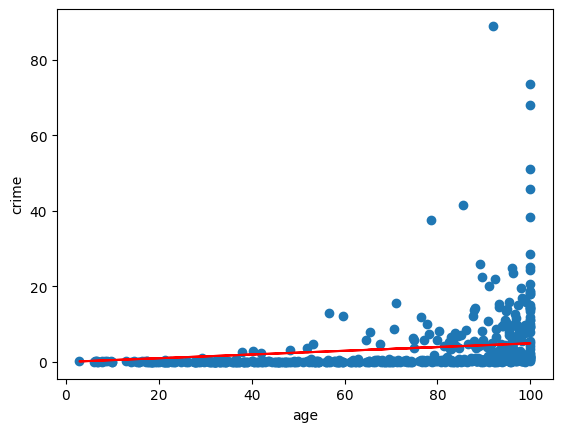

In [33]:
pl.xlabel("age")
pl.ylabel("crime")
graph(data2,predict2)
